# 加工データ追加後の可視化まとめ
`0202_Preprocessing_niko.ipynb`の後

## ライブラリのインポート

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["font.family"] = "IPAexGothic" # 日本語の文字化け防止
import seaborn as sns
sns.set(font="IPAexGothic",style="darkgrid")
pd.set_option("display.max_columns", 50) #jupyter notebook上で表示できるカラム数を50に設定

Duplicate key in file PosixPath('/Users/niko/Desktop/MyApp/study/python/environment_3_9_7/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 257 ('font.family:  IPAexGothic')


## データの読み込み

In [3]:
stadium = pd.read_csv("data/received/stadium.csv")
train = pd.read_csv("data/create/train_all_column_addition.csv")
# test = pd.read_csv("data/create/test_all_column_addition.csv")
# sample = pd.read_csv("data/received/sample_submit.csv",header=None)

# データの読み込み lat_lng.ipynbで緯度経度取得しteam_home_stadium.csvを作成している
team_home_stadium = pd.read_csv("data/create/team_home_stadium.csv")

In [4]:
stadium.head(1)

,name,address,capa
0,名古屋市瑞穂陸上競技場,愛知県名古屋市瑞穂区山下通5-1,20000


In [46]:
train.head(1)

,id,y,year,stage,match,gameday,time,home,away,stadium,tv,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,home_03,home_04,home_05,home_06,home_07,...,home_lat,home_long,away_lat,away_long,distance_km,mobilization,stage_stadium,stadium_mobilization,MONTH,WEEK,timezone,WEEK_timezone_num,nhk,WEATHER,temp_condition,hours,over_mobilization,holiday,referee_point,stadium_min,stadium_max,capa_bining,week_timezone,month_timezone,match_num
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,スカパー／ｅ２／スカパー光／ＮＨＫ総合,1,0,雨,3.8,66%,木村 博之,ベガルタ仙台,林 卓人,菅井 直樹,鎌田 次郎,上本 大海,田村 直也,富田 晋伍,角田 誠,...,38.319158,140.881857,35.992776,140.641766,259.062331,0.926678,Ｊ１ユアテックスタジアム仙台,0.766782,3,土,1,土1,1,雨,-1.2,14,1.208529,0,1,11144,18863,"(10000, 20000]",土noon,3noon,1


In [48]:
team_home_stadium.head(1)

,team,lat,long
0,アビスパ福岡,33.586139,130.460089


## あとでグラフで見やすいように、チームの所在地順のリストを作る
- `j1_team_list` と `j2_team_list`  
  名前だけのリスト j1_team_list[0:3] > ['大分トリニータ', 'サガン鳥栖', '徳島ヴォルティス']  
  (コードだけなので基本非表示にする)

In [5]:
# team_home_stadium = pd.read_csv("team_home_stadium.csv")
# 列の抽出例
team_home_stadium = team_home_stadium.loc[:,['team', 'lat', 'long']]
team_home_stadium.head()
# stageの追加(J1orJ2)
# train['stage', 'home_team']で重複の削除
j1j2_lists = train.loc[:,['stage', 'home_team']].drop_duplicates()
j1j2_lists = j1j2_lists.reindex(columns=['home_team', 'stage']) # 列の入れ替え
j1j2_lists = j1j2_lists.rename(columns={'home_team':'team'}) 
j1j2_lists = pd.merge(team_home_stadium, j1j2_lists, on="team")
j1j2_lists.head(6)

,team,lat,long,stage
0,アビスパ福岡,33.586139,130.460089,Ｊ２
1,アルビレックス新潟,37.882408,139.059359,Ｊ１
2,カターレ富山,36.624048,137.197171,Ｊ２
3,カマタマーレ讃岐,34.261684,133.786361,Ｊ２
4,ガイナーレ鳥取,35.458273,134.221166,Ｊ２
5,ガンバ大阪,34.811971,135.541163,Ｊ１


In [6]:
# 'stage'順の'lat'順に並び替え
j1j2_lists = j1j2_lists.sort_values(['stage', 'lat'])
# J1とJ2に分ける
j1_lists = j1j2_lists[j1j2_lists['stage'] == 'Ｊ１']
j2_lists = j1j2_lists[j1j2_lists['stage'] == 'Ｊ２']
j1_lists.head(2)

,team,lat,long,stage
29,大分トリニータ,33.200786,131.657500,Ｊ１
10,サガン鳥栖,33.372508,130.520424,Ｊ１


In [7]:
# 名前だけのリストにする
j1_team_list = j1_lists['team'].tolist()
j2_team_list = j2_lists['team'].tolist()
j1_team_list[0:3]

['大分トリニータ', 'サガン鳥栖', '徳島ヴォルティス']

## 可視化

### J1とJ2はどうか

<AxesSubplot:xlabel='stage', ylabel='y'>

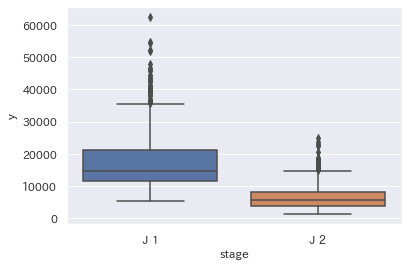

In [8]:
sns.boxplot(x="stage", y="y", data=train)

<AxesSubplot:xlabel='stage', ylabel='y'>

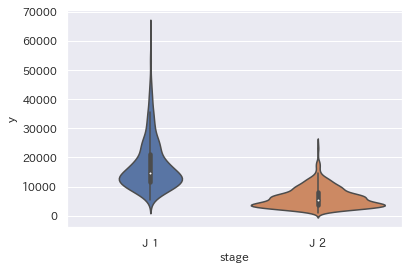

In [9]:
sns.violinplot(x="stage", y="y", data=train)

### スタジアムごとのcapaのちがい

<AxesSubplot:xlabel='name'>

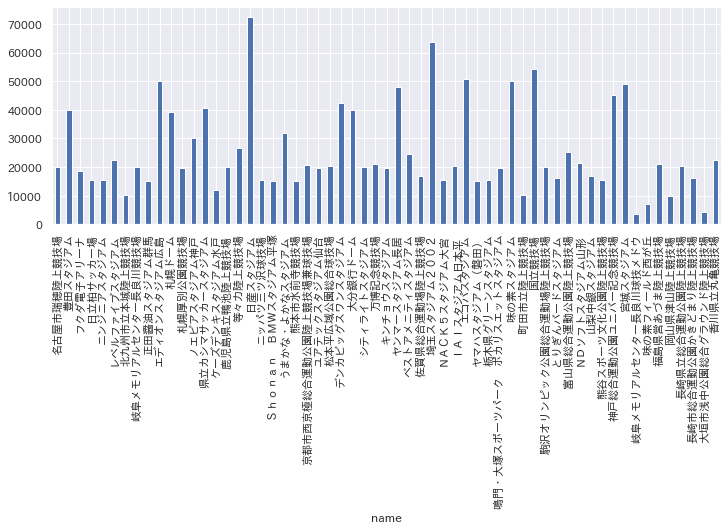

In [10]:
stadium.index = stadium["name"]
plt.tight_layout()
stadium["capa"].plot.bar(figsize=(12,4))

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '(-1, 10000]'),
  Text(1, 0, '(10000, 20000]'),
  Text(2, 0, '(20000, 30000]'),
  Text(3, 0, '(30000, 40000]'),
  Text(4, 0, '(40000, 50000]'),
  Text(5, 0, '(50000, 1000000]')])

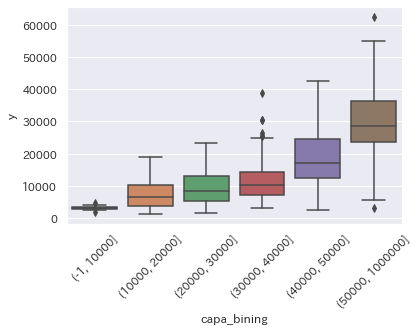

In [11]:
train["capa_bining"] = pd.cut(train["capa"],[-1,10000,20000,30000,40000,50000,1000000])
sns.boxplot(x="capa_bining", y="y", data=train)
plt.xticks(rotation=45)

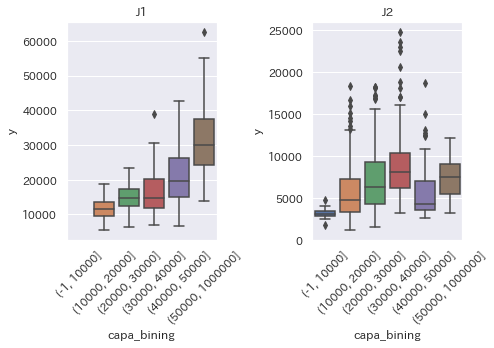

In [12]:
fig,ax = plt.subplots(1,2,figsize=(7,5))
a = sns.boxplot(x="capa_bining", y="y", data=train[train["stage"]=="Ｊ１"], ax=ax[0])
ax[0].set_xticklabels(a.get_xticklabels(), rotation=45)
ax[0].set_title("J1")
a = sns.boxplot(x="capa_bining", y="y", data=train[train["stage"]=="Ｊ２"], ax=ax[1])
ax[1].set_xticklabels(a.get_xticklabels(), rotation=45)
ax[1].set_title("J2")
plt.tight_layout()

#### スタジアム✖️観客数y

/var/folders/x4/8hbz4flj6_bg96s9y3b69rb80000gn/T/ipykernel_30695/1754649678.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


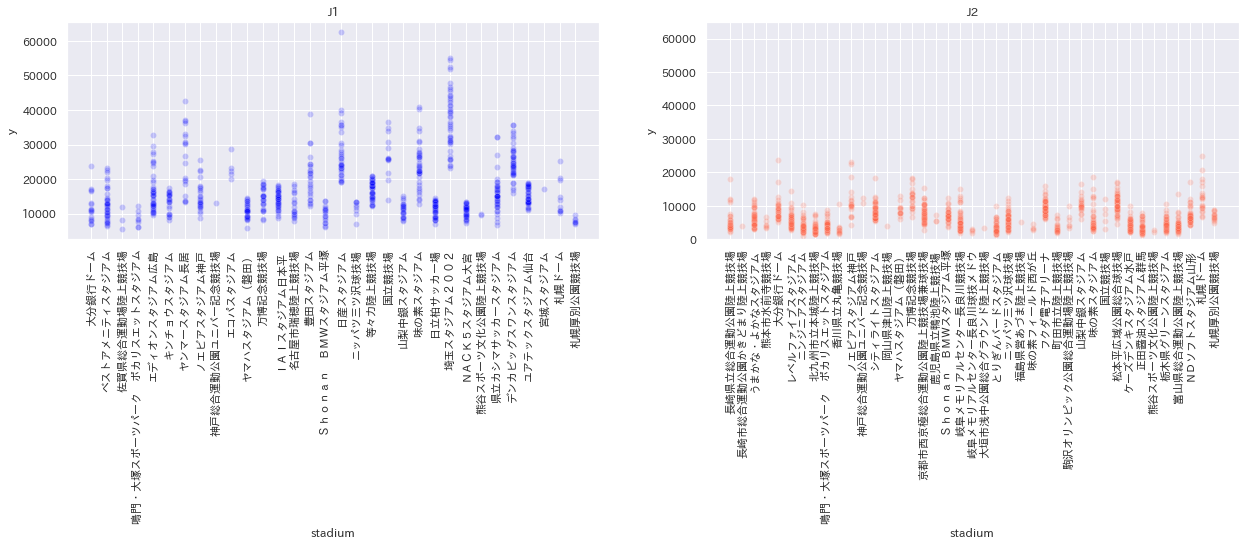

In [13]:
# 複数の絵を同時に描きたい時にsubplots関数を使う
fig,ax = plt.subplots(1,2,figsize=(21,4))

ax[0].set_title("J1")
sns.scatterplot(x="stadium",y="y",data=train[train["stage"]=="Ｊ１"].sort_values('home_lat'), ax=ax[0], color='blue', alpha=0.2)
ax[1].set_title("J2")
sns.scatterplot(x="stadium",y="y",data=train[train["stage"]=="Ｊ２"].sort_values('home_lat'), ax=ax[1], color='tomato', alpha=0.2)
# subplotsで全てのラベルを回転させる
for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)

for tick in ax[1].get_xticklabels():
    tick.set_rotation(90)
plt.ylim(0,65000)
plt.tight_layout()

#### スタジアム✖️観客動員数率mobilization

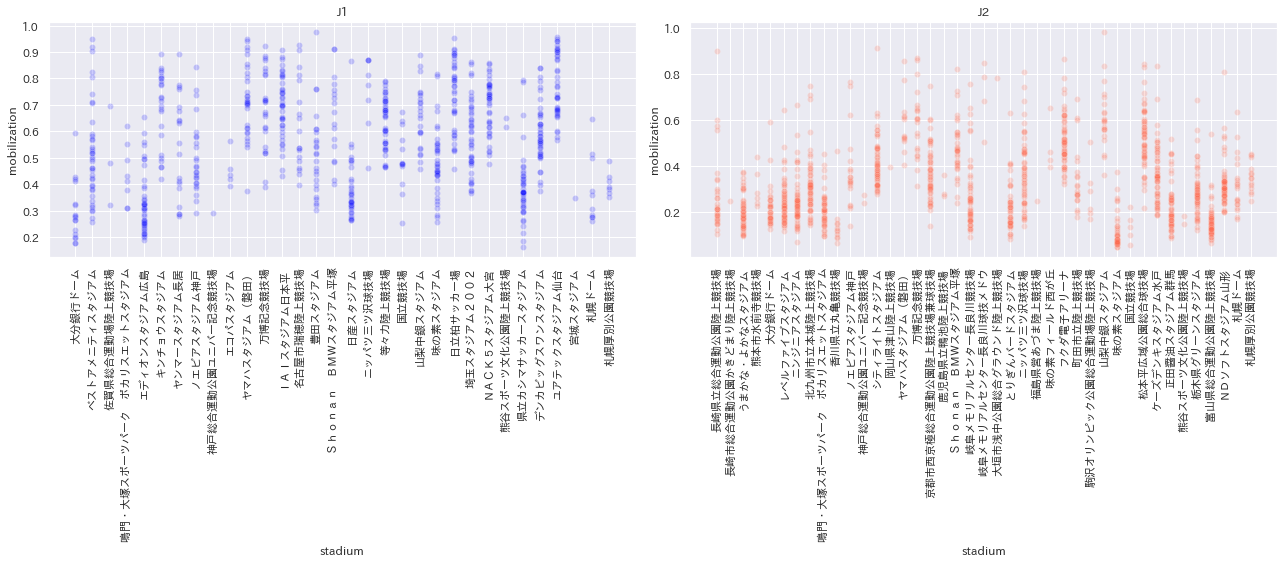

In [14]:
# 複数の絵を同時に描きたい時にsubplots関数を使う
fig,ax = plt.subplots(1,2,figsize=(18,8))

ax[0].set_title("J1")
sns.scatterplot(x="stadium",y="mobilization",data=train[train["stage"]=="Ｊ１"].sort_values('home_lat'), ax=ax[0], color='blue', alpha=0.2)
ax[1].set_title("J2")
sns.scatterplot(x="stadium",y="mobilization",data=train[train["stage"]=="Ｊ２"].sort_values('home_lat'), ax=ax[1], color='tomato', alpha=0.2)
# subplotsで全てのラベルを回転させる
for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)

for tick in ax[1].get_xticklabels():
    tick.set_rotation(90)
# plt.ylim(0,65000)
plt.tight_layout()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '(-1, 10000]'),
  Text(1, 0, '(10000, 20000]'),
  Text(2, 0, '(20000, 30000]'),
  Text(3, 0, '(30000, 40000]'),
  Text(4, 0, '(40000, 50000]'),
  Text(5, 0, '(50000, 1000000]')])

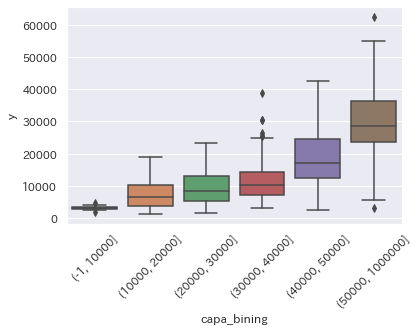

In [15]:
train["capa_bining"] = pd.cut(train["capa"],[-1,10000,20000,30000,40000,50000,1000000])
sns.boxplot(x="capa_bining", y="y", data=train)
plt.xticks(rotation=45)

In [16]:
# 名前だけのリストにする
j1_team_list = j1_lists['team'].tolist()
j2_team_list = j2_lists['team'].tolist()
j1_team_list[0:3]

['大分トリニータ', 'サガン鳥栖', '徳島ヴォルティス']

### 観客動員数の分布

<AxesSubplot:title={'center':'観客動員数の分布'}, ylabel='Frequency'>

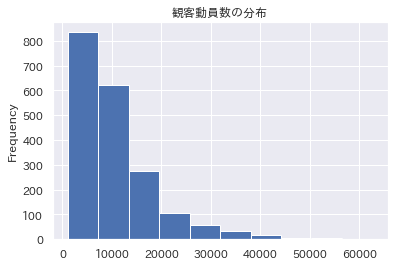

In [17]:
train["y"].plot.hist(grid=True,title="観客動員数の分布")

### 点数の分布

<AxesSubplot:title={'center':'点数の分布'}, ylabel='Frequency'>

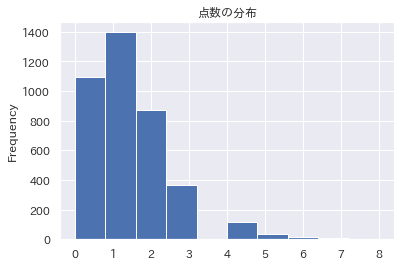

In [18]:
pd.concat([train['home_score'], train['away_score']]).plot.hist(grid=True, title='点数の分布')

### 曜日✖️観客動員数の分布

In [19]:
tmp = train[["y", "gameday"]].copy()
# 文字列を分割して上手く抽出
tmp["dayofweek"] = tmp["gameday"].apply(lambda x : x[x.find("(")+1:x.find("(")+2])
# 正規表現を使って抽出
tmp["dayofweek2"] = tmp["gameday"].str.extract("(月|火|水|木|金|土|日)")
tmp.head(1)

,y,gameday,dayofweek,dayofweek2
0,18250,03/10(土),土,土


In [20]:
order = {"月":0, "火":1, "水":2, "木":3, "金":4, "土":5, "日":6}
# map()の場合
tmp["order"] = tmp["dayofweek"].map(order)
# apply(lambda)の場合
tmp["order2"] = tmp["dayofweek"].apply(lambda x: order[x])

tmp = tmp.sort_values(by="order")
tmp.head(1)

,y,gameday,dayofweek,dayofweek2,order,order2
853,16411,05/06(月・休),月,月,0,0


### 月✖️観客動員数

<AxesSubplot:xlabel='dayofweek', ylabel='y'>

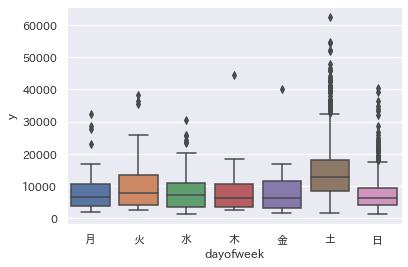

In [21]:
sns.boxplot(x="dayofweek", y="y", data=tmp)

<AxesSubplot:xlabel='month', ylabel='y'>

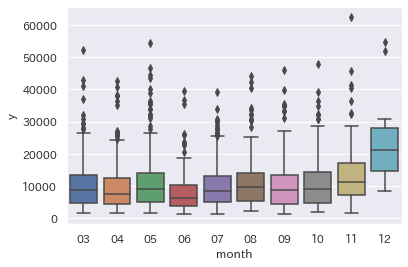

In [22]:
tmp = train.copy()
tmp['month'] = tmp['gameday'].apply(lambda x: x[:2])
sns.boxplot(x="month", y="y", data=tmp)

In [23]:
# 曜日+時間の列を作成

def week_timezone(row):
    if int(row['time'][:2]) >= 18:
        time_zone = 'night'
    else:
        time_zone = 'noon'
    week_time = row['WEEK'] + time_zone
    return week_time

def month_timezone(row):
    if int(row['time'][:2]) >= 18:
        time_zone = 'night'
    else:
        time_zone = 'noon'
    month_timezone = str(row['MONTH']) + time_zone
    return month_timezone

In [24]:
train['week_timezone'] = train.apply(week_timezone, axis=1)
# train.columns
# test['week_timezone'] = test.apply(week_timezone, axis=1)
train['month_timezone'] = train.apply(month_timezone, axis=1)
# train.columns
# test['month_timezone'] = test.apply(month_timezone, axis=1)
# test.head(1)

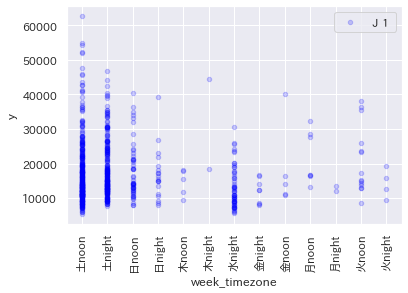

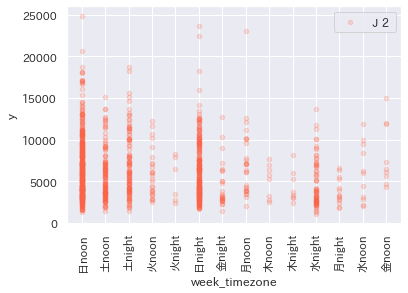

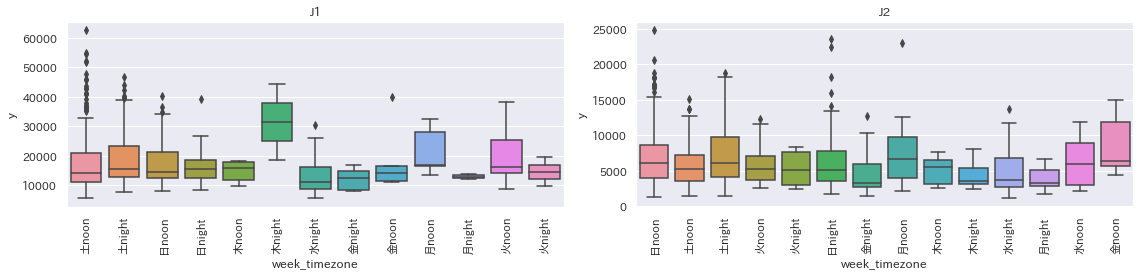

In [25]:
train[train['stage'] == 'Ｊ１'].plot.scatter(x='week_timezone', y='y', label='Ｊ１', color='blue', alpha=0.2)
plt.xticks(rotation=90)
train[train['stage'] == 'Ｊ２'].plot.scatter(x='week_timezone', y='y', label='Ｊ２', color='tomato', alpha=0.2)
plt.xticks(rotation=90)

fig,ax = plt.subplots(1,2,figsize=(16,4))
a = sns.boxplot(x="week_timezone", y="y", data=train[train["stage"]=="Ｊ１"], ax=ax[0])
ax[0].set_xticklabels(a.get_xticklabels(), rotation=90)
ax[0].set_title("J1")
a = sns.boxplot(x="week_timezone", y="y", data=train[train["stage"]=="Ｊ２"], ax=ax[1])
ax[1].set_xticklabels(a.get_xticklabels(), rotation=90)
ax[1].set_title("J2")
plt.tight_layout()


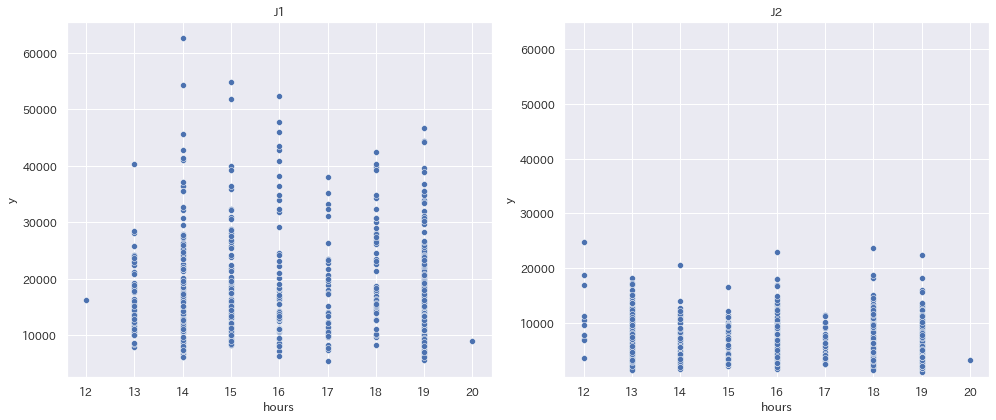

In [26]:
# 複数の絵を同時に描きたい時にsubplots関数を使う
fig,ax = plt.subplots(1,2,figsize=(14,6))

ax[0].set_title("J1")
sns.scatterplot(x="hours",y="y",data=train[train["stage"]=="Ｊ１"], ax=ax[0])
ax[1].set_title("J2")
sns.scatterplot(x="hours",y="y",data=train[train["stage"]=="Ｊ２"], ax=ax[1])
plt.ylim(100,65000)
plt.tight_layout()
# 20時始まりは少なそう

In [27]:
# 祝日だけのdf
holiday=train[train['gameday'].str.contains('祝')]
# 休日だけのdf
holiday_2=train[train['gameday'].str.contains('休')]

In [28]:
# 名前だけのリストにする
j1_team_list = j1_lists['team'].tolist()
j2_team_list = j2_lists['team'].tolist()
j1_team_list[0:3]

['大分トリニータ', 'サガン鳥栖', '徳島ヴォルティス']

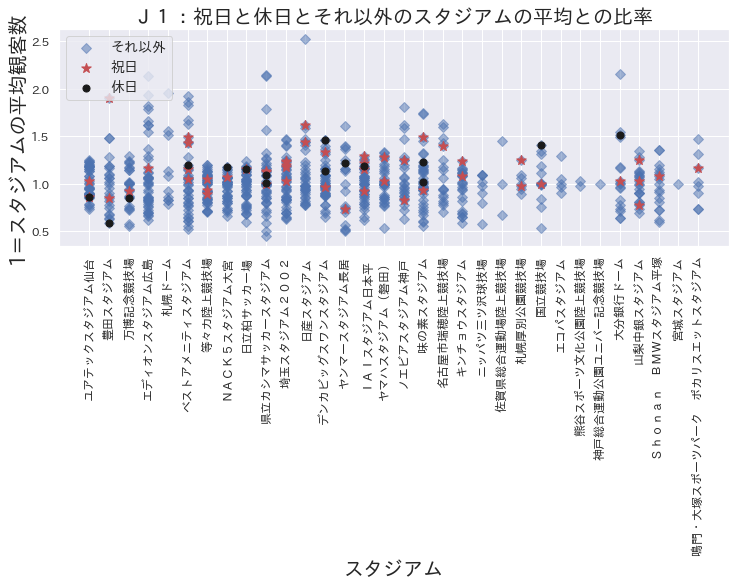

In [29]:
# plt.xlim(15.0, 40.0) # x軸の表示範囲
# plt.ylim(300, 750) # y軸の表示範囲
plt.figure(figsize=(12,4))
plt.title('Ｊ１：祝日と休日とそれ以外のスタジアムの平均との比率', fontsize=20) # タイトル
plt.xlabel("スタジアム", fontsize=20) # x軸ラベル
plt.ylabel("1＝スタジアムの平均観客数", fontsize=20) # y軸ラベル
plt.grid(True) # 目盛線の表示
plt.tick_params(labelsize = 12) # 目盛線のラベルサイズ

# グラフの描画 マークの設定(s:サイズ, c:色, marker:形, alpha:透過)
plt.scatter(x="stadium",y="over_mobilization",data=train[(train["stage"]=="Ｊ１")], s=50, c="b", marker="D", alpha=0.5, label="それ以外")
plt.scatter(x="stadium",y="over_mobilization",data=holiday[(holiday["stage"]=="Ｊ１")], s=100, c="r", marker="*", alpha=1, label="祝日")
plt.scatter(x="stadium",y="over_mobilization",data=holiday_2[(holiday_2["stage"]=="Ｊ１")], s=50, c="k", marker="o", alpha=1, label="休日")
plt.legend(loc="upper left", fontsize=14) # 凡例表示
plt.xticks(rotation=90)
plt.show()

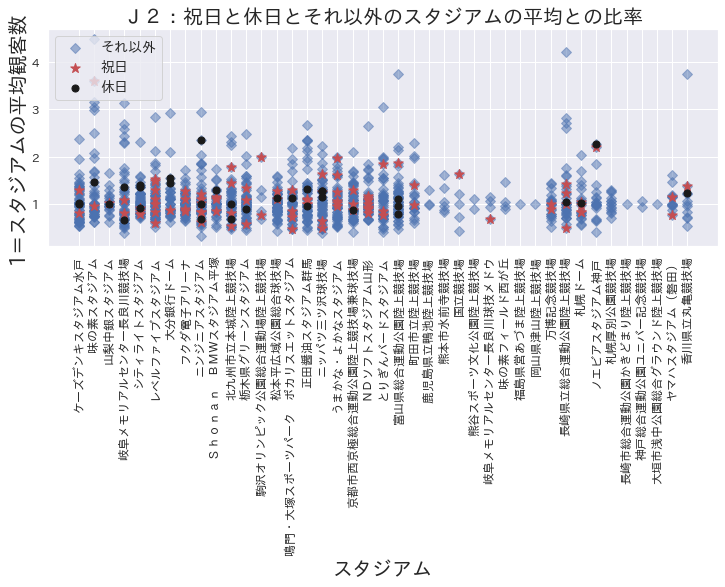

In [30]:
# plt.xlim(15.0, 40.0) # x軸の表示範囲
# plt.ylim(300, 750) # y軸の表示範囲
plt.figure(figsize=(12,4))
plt.title('Ｊ２：祝日と休日とそれ以外のスタジアムの平均との比率', fontsize=20) # タイトル
plt.xlabel("スタジアム", fontsize=20) # x軸ラベル
plt.ylabel("1＝スタジアムの平均観客数", fontsize=20) # y軸ラベル
plt.grid(True) # 目盛線の表示
plt.tick_params(labelsize = 12) # 目盛線のラベルサイズ

plt.scatter(x="stadium",y="over_mobilization",data=train[(train["stage"]=="Ｊ２")], s=50, c="b", marker="D", alpha=0.5, label="それ以外")
plt.scatter(x="stadium",y="over_mobilization",data=holiday[(holiday["stage"]=="Ｊ２")], s=100, c="r", marker="*", alpha=1, label="祝日")
plt.scatter(x="stadium",y="over_mobilization",data=holiday_2[(holiday_2["stage"]=="Ｊ２")], s=50, c="k", marker="o", alpha=1, label="休日")

plt.legend(loc="upper left", fontsize=14) # 凡例表示
plt.xticks(rotation=90)
plt.show()

### J1チームの各対戦組み合わせの平均観客動員数

#### J1チーム

<AxesSubplot:xlabel='away', ylabel='home'>

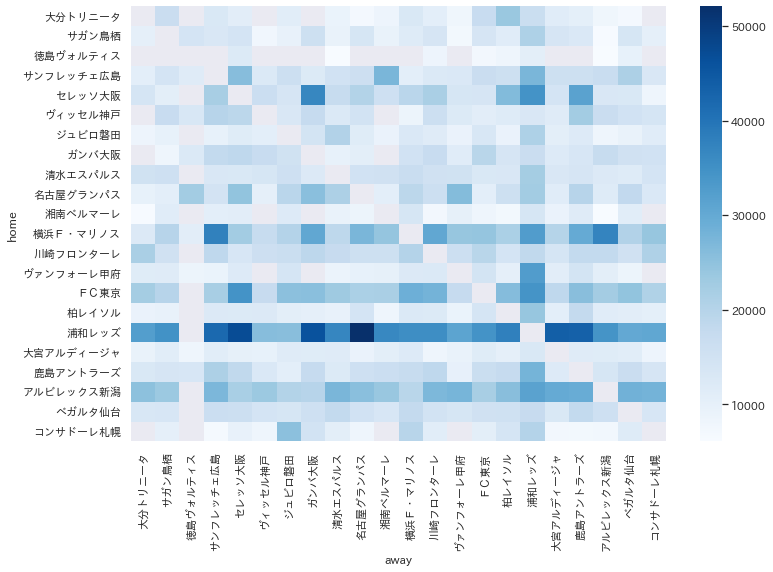

In [31]:
tmp = train[train["stage"]=="Ｊ１"]
cb = pd.pivot_table(tmp, index="away", columns="home", values="y")
plt.figure(figsize=(12,8))
corr = cb
corr_ordered = corr[j1_team_list].T[j1_team_list] # indexとclumnsの並び順の指定
sns.heatmap(corr_ordered, cmap='Blues')

#### J2チーム

<AxesSubplot:xlabel='away', ylabel='home'>

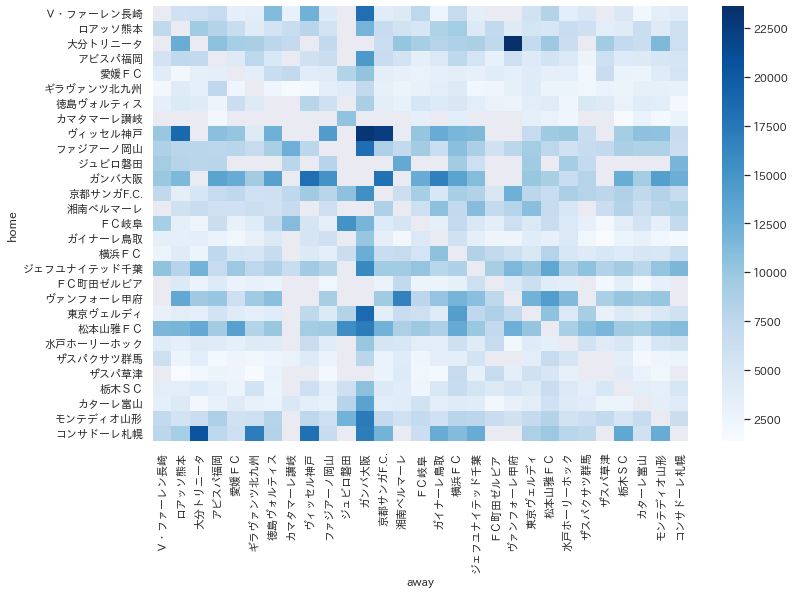

In [32]:
tmp2 = train[train["stage"]=="Ｊ２"]
cb = pd.pivot_table(tmp2, index="away", columns="home", values="y")
plt.figure(figsize=(12,8))
corr = cb
corr_ordered = corr[j2_team_list].T[j2_team_list] # indexとclumnsの並び順の指定
sns.heatmap(corr_ordered, cmap='Blues')

### home

#### homeの時の観客数(チーム別)

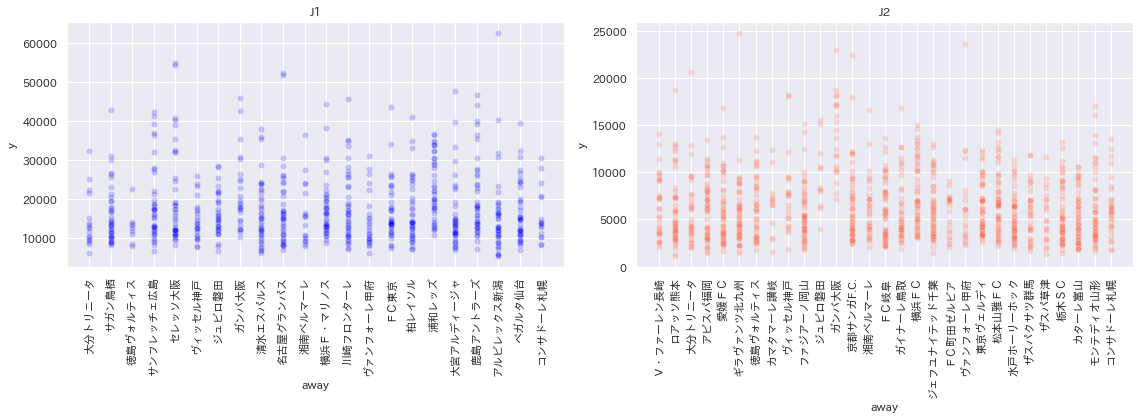

In [33]:
# 複数の絵を同時に描きたい時にsubplots関数を使う
fig,ax = plt.subplots(1,2,figsize=(16,6))

ax[0].set_title("J1")
sns.scatterplot(x="away",y="y",data=train[train["stage"]=="Ｊ１"].sort_values('away_lat'), ax=ax[0], color='blue', alpha=0.2)
ax[1].set_title("J2")
sns.scatterplot(x="away",y="y",data=train[train["stage"]=="Ｊ２"].sort_values('away_lat'), ax=ax[1], color='tomato', alpha=0.2)
# subplotsで全てのラベルを回転させる
for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)

for tick in ax[1].get_xticklabels():
    tick.set_rotation(90)
# plt.ylim(0,65000)
plt.tight_layout()

In [34]:
# 名前だけのリストにする
j1_team_list = j1_lists['team'].tolist()
j2_team_list = j2_lists['team'].tolist()
j1_team_list[0:3]

['大分トリニータ', 'サガン鳥栖', '徳島ヴォルティス']

### away

#### awayの時の観客数(チーム別)

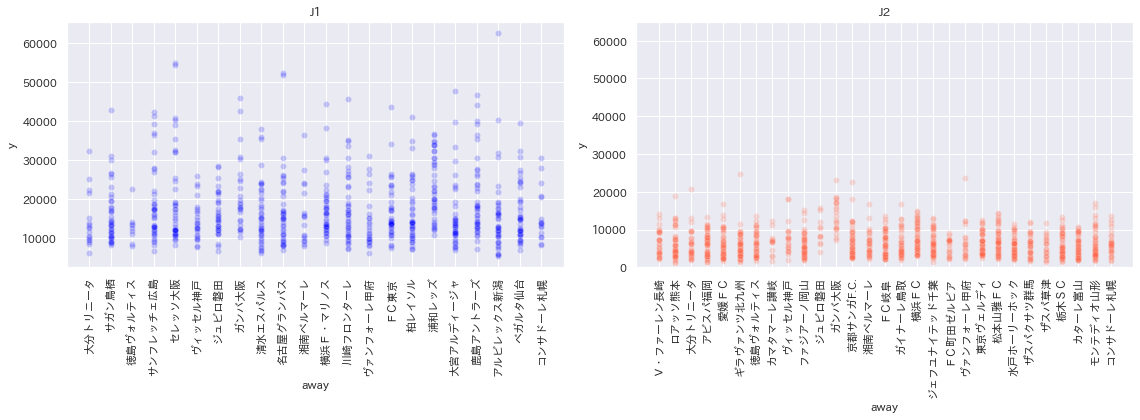

In [35]:
# 複数の絵を同時に描きたい時にsubplots関数を使う
fig,ax = plt.subplots(1,2,figsize=(16,6))

ax[0].set_title("J1")
sns.scatterplot(x="away",y="y",data=train[train["stage"]=="Ｊ１"].sort_values('away_lat'), ax=ax[0], color='blue', alpha=0.2)
ax[1].set_title("J2")
sns.scatterplot(x="away",y="y",data=train[train["stage"]=="Ｊ２"].sort_values('away_lat'), ax=ax[1], color='tomato', alpha=0.2)
# subplotsで全てのラベルを回転させる
for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)

for tick in ax[1].get_xticklabels():
    tick.set_rotation(90)
plt.ylim(0,65000)
plt.tight_layout()

### 節数✖️観客数

#### 全体(J1とJ2)

<AxesSubplot:xlabel='match_num', ylabel='y'>

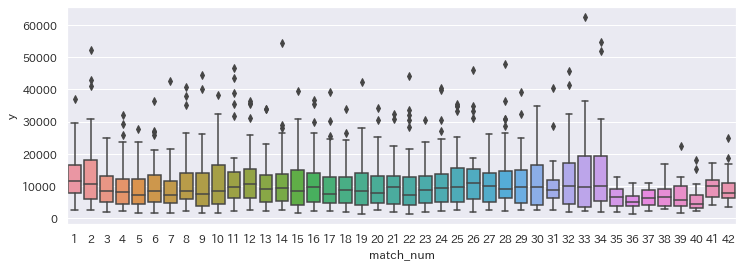

In [36]:
# 節数は「第」と「節」に挟まれている為、この文字をヒントに場所を指定
train["match_num"] = train["match"].apply(lambda x : int(x[x.find("第")+1:x.find("節")]))
plt.figure(figsize=(12,4))
sns.boxplot(x="match_num", y="y", data=train)

#### J1とJ2を別で見る

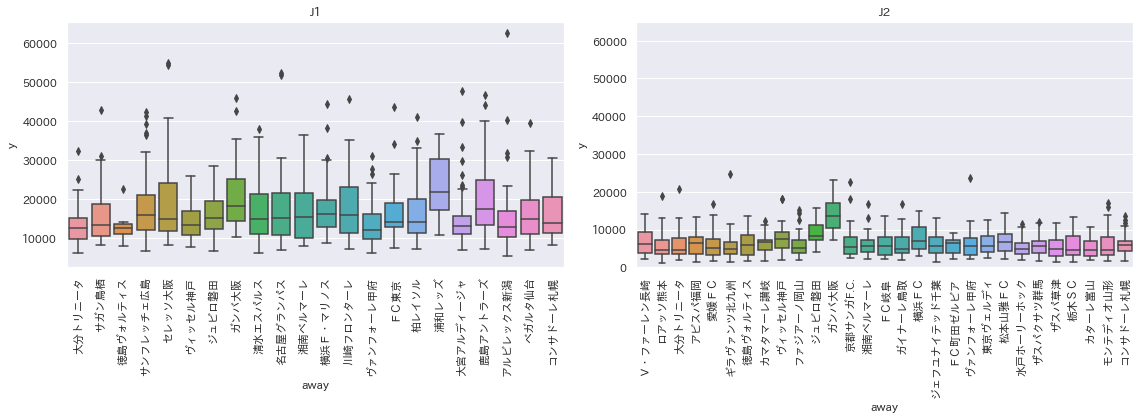

In [37]:
# 複数の絵を同時に描きたい時にsubplots関数を使う
fig,ax = plt.subplots(1,2,figsize=(16,6))
# order 表示の順番リスト
ax[0].set_title("J1")
sns.boxplot(x="away",y="y",data=train[train["stage"]=="Ｊ１"], ax=ax[0], order=j1_team_list)
ax[1].set_title("J2")
sns.boxplot(x="away",y="y",data=train[train["stage"]=="Ｊ２"], ax=ax[1], order=j2_team_list)
# subplotsで全てのラベルを回転させる
for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)

for tick in ax[1].get_xticklabels():
    tick.set_rotation(90)
plt.ylim(0,65000)
plt.tight_layout()

### TV

#### 放送局の数とyを比べてみる

<AxesSubplot:xlabel='tv_num', ylabel='y'>

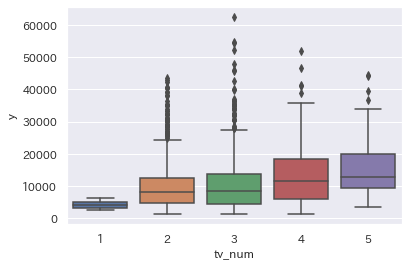

In [38]:
# "／"で分割した時の長さ=tv数となる
train["tv_num"] = train["tv"].apply(lambda x : len(x.split("／")))
sns.boxplot(x="tv_num", y="y", data=train)

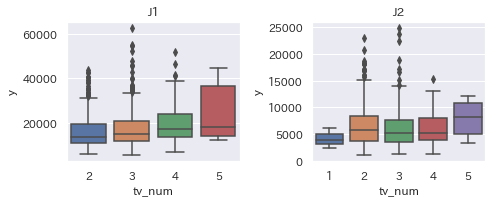

In [39]:
fig,ax = plt.subplots(1,2,figsize=(7,3))
sns.boxplot(x="tv_num", y="y", data=train[train["stage"]=="Ｊ１"], ax=ax[0])
ax[0].set_title("J1")
sns.boxplot(x="tv_num", y="y", data=train[train["stage"]=="Ｊ２"], ax=ax[1])
ax[1].set_title("J2")
plt.tight_layout()

#### NHKで放送されているとき

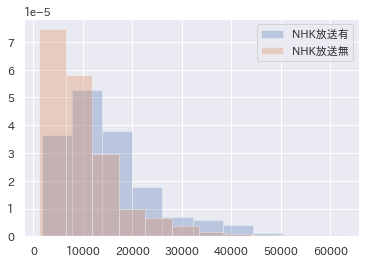

In [40]:
tmp = train.copy()
tmp['NHK'] = tmp['tv'].str.contains('ＮＨＫ')
tmp[tmp['NHK']==True]['y'].hist(density=True, alpha=0.3, label='NHK放送有')
tmp[tmp['NHK']==False]['y'].hist(density=True, alpha=0.3, label='NHK放送無')
plt.legend()

#### NHK総合が放送されているとき
スタジアムごとの観客数

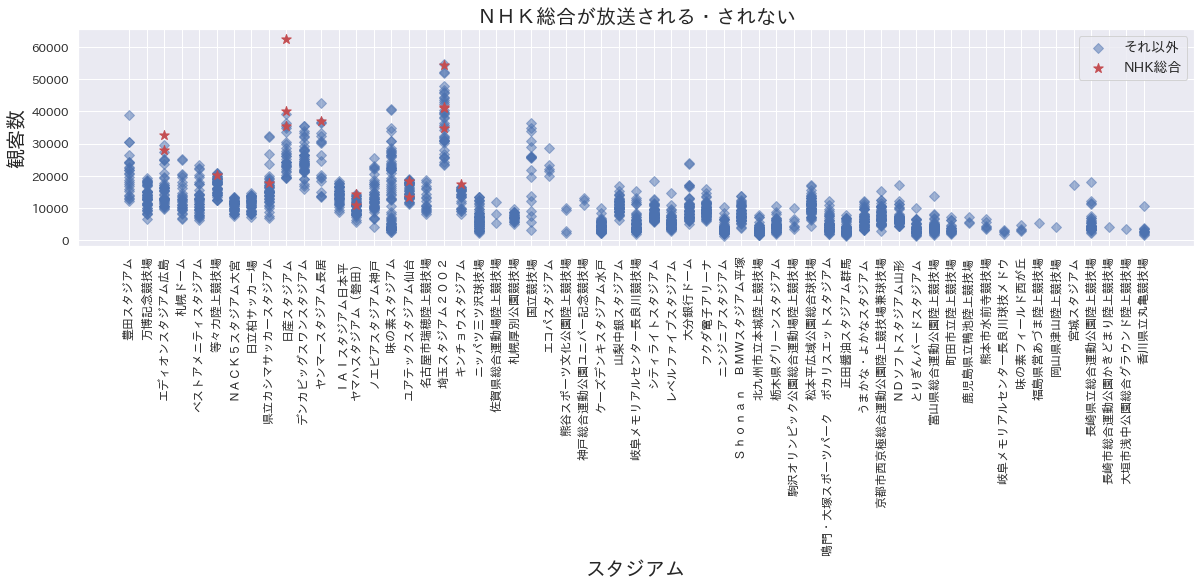

In [41]:
# plt.xlim(15.0, 40.0) # x軸の表示範囲
# plt.ylim(300, 750) # y軸の表示範囲
plt.figure(figsize=(20,4))
plt.title('ＮＨＫ総合が放送される・されない', fontsize=20) # タイトル
plt.xlabel("スタジアム", fontsize=20) # x軸ラベル
plt.ylabel("観客数", fontsize=20) # y軸ラベル
plt.grid(True) # 目盛線の表示
plt.tick_params(labelsize = 12) # 目盛線のラベルサイズ

# グラフの描画 マークの設定(s:サイズ, c:色, marker:形, alpha:透過)
plt.scatter(x="stadium",y="y",data=train[(train["nhk"]==0)], s=50, c="b", marker="D", alpha=0.5, label="それ以外")
plt.scatter(x="stadium",y="y",data=train[(train["nhk"]==1)], s=100, c="r", marker="*", alpha=1, label="NHK総合")

plt.legend(loc="upper right", fontsize=14) # 凡例表示
plt.xticks(rotation=90)
plt.show()

### 距離

#### 距離と観客数

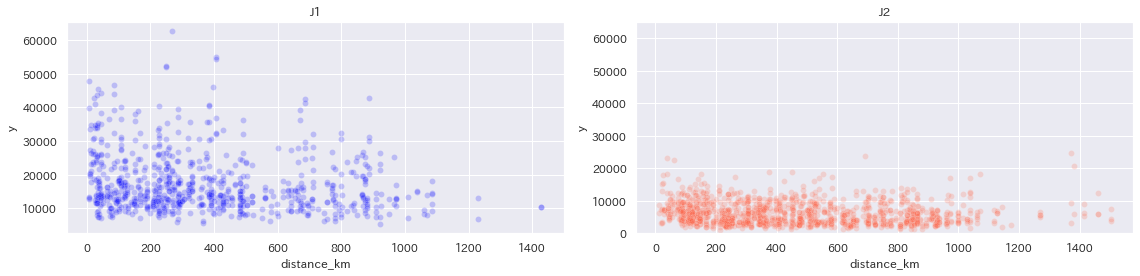

In [42]:
# 複数の絵を同時に描きたい時にsubplots関数を使う
fig,ax = plt.subplots(1,2,figsize=(16,4))

ax[0].set_title("J1")
sns.scatterplot(x="distance_km",y="y",data=train[train["stage"]=="Ｊ１"], ax=ax[0], color='blue', alpha=0.2)
ax[1].set_title("J2")
sns.scatterplot(x="distance_km",y="y",data=train[train["stage"]=="Ｊ２"], ax=ax[1], color='tomato', alpha=0.2)
plt.ylim(0,65000)
plt.tight_layout()


### 気温temperature✖️観客数y

<AxesSubplot:xlabel='temperature', ylabel='y'>

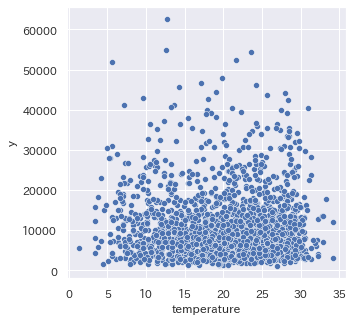

In [43]:
plt.figure(figsize=(5,5))
sns.scatterplot(x="temperature",y="y",data=train)

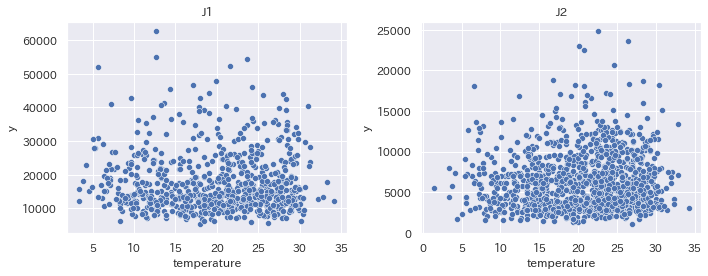

In [44]:
# 複数の絵を同時に描きたい時にsubplots関数を使う
fig,ax = plt.subplots(1,2,figsize=(10,4))

ax[0].set_title("J1")
sns.scatterplot(x="temperature",y="y",data=train[train["stage"]=="Ｊ１"], ax=ax[0])
ax[1].set_title("J2")
sns.scatterplot(x="temperature",y="y",data=train[train["stage"]=="Ｊ２"], ax=ax[1])
plt.tight_layout()

### 審判

#### 審判✖️（チーム＊J1＊（or J2）*スタジアムの平均観客導入率）over_mobilization

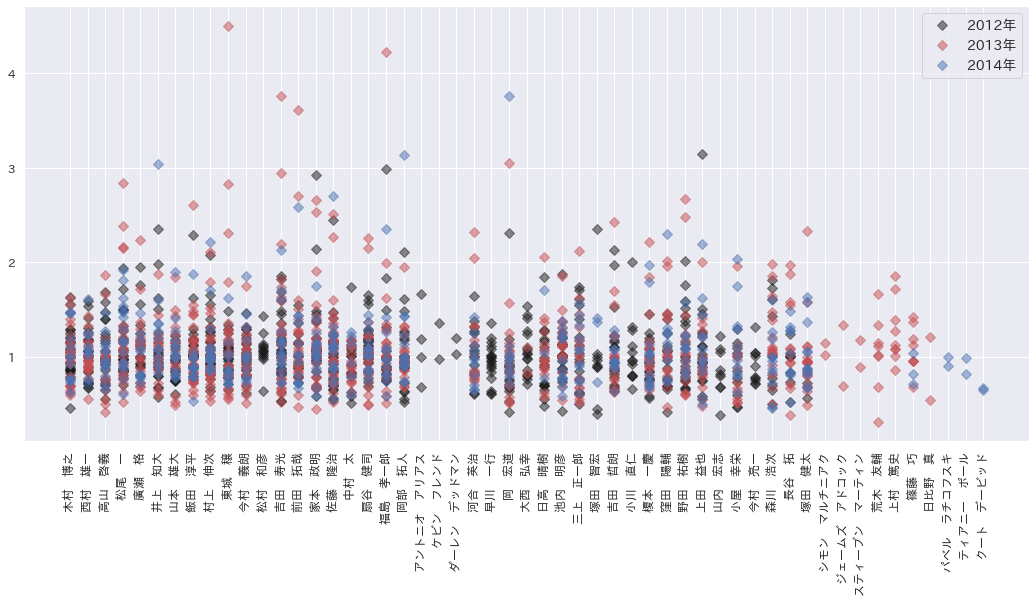

In [51]:
plt.figure(figsize=(18,8))
plt.grid(True) # 目盛線の表示
plt.tick_params(labelsize = 12) # 目盛線のラベルサイズ

# グラフの描画 マークの設定(s:サイズ, c:色, marker:形, alpha:透過)
plt.scatter(x="referee",y="over_mobilization",data=train[(train["year"]==2012)], s=50, c="k", marker="D", alpha=0.5, label="2012年")
plt.scatter(x="referee",y="over_mobilization",data=train[(train["year"]==2013)], s=50, c="r", marker="D", alpha=0.5, label="2013年")
plt.scatter(x="referee",y="over_mobilization",data=train[(train["year"]==2014)], s=50, c="b", marker="D", alpha=0.5, label="2014年")

plt.legend(loc="upper right", fontsize=14) # 凡例表示
plt.xticks(rotation=90)
plt.show()